It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

* Do any of your classifiers seem to overfit?
* Which seem to perform the best? Why?
* Which features seemed to be most impactful to performance?

Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance.

I chose the [yelp.com data](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences) to classify.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns

In [2]:
raw_data = pd.read_csv('data/yelp_labelled.txt', delimiter='\t', encoding='latin-1',
                      header=None)
raw_data.columns = ['messages','review']

In [3]:
# Fixing display option to show complete messages
pd.set_option('display.max_colwidth', -1)

In [4]:
raw_data.head(3)

,messages,review
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0


In [5]:
df = raw_data.copy()

### Model 1 - Identifying Negative Messages

In [6]:
# Selecting negative keywords
keywords = ['avoid', 'bad', 'disappointed','nasty', 'overpriced', 'slow', 'tasteless','rude', 
            'undercooked', 'wasted', 'terrible', 'wasted','avoid','not ']

for key in keywords:
    df[str(key)] = df.messages.str.contains(
    '' + str(key) + '',
    case=False)

In [7]:
# Feature for detecting all caps messages
df['allcaps'] = df['messages'].str.isupper()

In [8]:
df.head()

,messages,review,avoid,bad,disappointed,nasty,overpriced,slow,tasteless,rude,undercooked,wasted,terrible,not,allcaps
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False,False,False,False,False,False,False,True,False
2,Not tasty and the texture was just nasty.,0,False,False,False,True,False,False,False,False,False,False,False,True,False
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so were the prices.,1,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data = df[keywords + ['avoid']]
target = df['review']

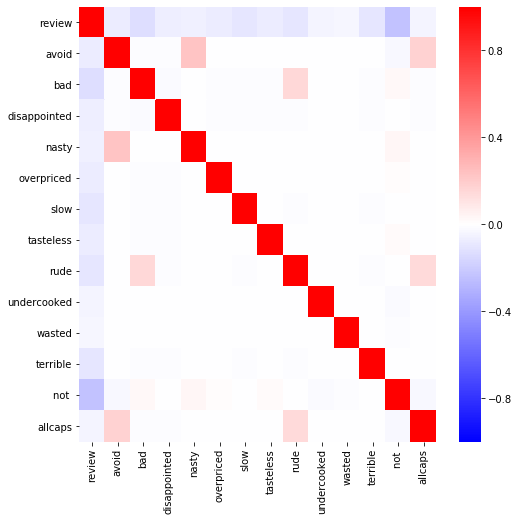

In [10]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), center=0, cmap='bwr',vmax=1,vmin=-1)

#### Negative words with .2 or higher (not including message): Avoid, bad, nasty, rude, allcaps.  Let's see how the Bernoulli classifier is labeling this dataset.

### Model 1 - Bernoulli Naive Bayes Model

In [11]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable
bnb = BernoulliNB()

# Fit our model to the data
y_pred = bnb.fit(data, target).predict(data)

# Display our results
print('Number of mislabeled reviews out of a total {} reviews: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
))
print("Accuracy : {}%".format(
    bnb.score(data, target) * 100
))

Number of mislabeled reviews out of a total 1000 reviews: 356
Accuracy : 64.4%


In [12]:
df['messages'].sample(20)

355    On the good side, the staff was genuinely pleasant and enthusiastic - a real treat.                                                                
515    The food is very good for your typical bar food.                                                                                                   
775    Their frozen margaritas are WAY too sugary for my taste.                                                                                           
470    Very good, though!                                                                                                                                 
357    As always the evening was wonderful and the food delicious!                                                                                        
851    I probably would not go here again.                                                                                                                
528    This was my first time and I can't wait until the next.        

In [13]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
results = confusion_matrix(target,y_pred)

print('CONFUSION MATRIX:')

print(results)
print('\n' + 'ACCURACTY SCORE:',accuracy_score(target, y_pred))
# TP, FP, FN, TN  
# columns pred, rows target due to order above

CONFUSION MATRIX:
[[166 334]
 [ 22 478]]

ACCURACTY SCORE: 0.644


* Out of the 500 actual instances of positive reviews(1st row), the classifier predicted correctly 166 of them.  Since we had used negative keywords, this makes sense.
* Out of the 500 actual instances of negative reviews (2nd row), the classifer predicted correctly 478 of them.
* Out of all 1000 reviews, the classifier predicted correctly 644 of them.

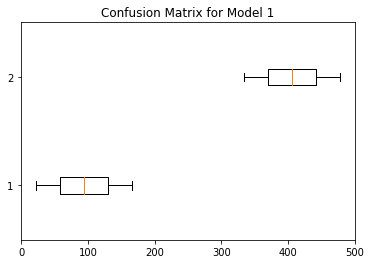

In [14]:
# Confusion Matrix spread
fig1, ax1 = plt.subplots()
ax1.set_title('Confusion Matrix for Model 1')
ax1.boxplot(results, vert=False)
plt.show()

Boxplot 1 shows the _True Positive (166)_ and _False Negative (22)_ spread, while boxplot 2 shows the _False Positive (334)_ and _True Negative (478)_ spread.

In [15]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.605
Testing on Sample: 0.644


In [16]:
from sklearn.model_selection import cross_val_score
score1 = cross_val_score(bnb, data, target, cv=10)

print(score1)

[0.62 0.64 0.63 0.59 0.64 0.67 0.69 0.65 0.66 0.64]


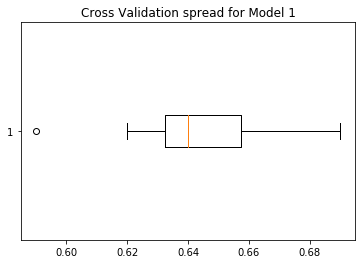

In [17]:
fig1, ax1 = plt.subplots()
ax1.set_title('Cross Validation spread for Model 1')
ax1.boxplot(score1, vert=False)
plt.show()

Testing with a 20% hold group comes out as 3.9% less with 20% holdout and identical on the testing sample.  And looking at the spread, there is only one outlier at 0.59 and since it is within .10 of the mean, it isn't a concern.

Let's change models and see if there are any changes.

### Model 2 - Gaussian Naive Bayes

Using the same keywords and dataset for second model.

In [18]:
data2 = df[keywords + ['avoid']]
target2 = df['review']

In [19]:
# Model 2 - Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

y_pred2 = gnb.fit(data2, target2).predict(data2)
print('Number of mislabeled reviews out of a total {} reviews: {}'.format(
    data2.shape[0],
    (target2 != y_pred2).sum()
))
print("Accuracy : {}%".format(
    gnb.score(data2, target2) * 100
))

Number of mislabeled reviews out of a total 1000 reviews: 434
Accuracy : 56.599999999999994%


In [20]:
# Model 2 - Create confusion matrix
results2 = confusion_matrix(target2,y_pred2)

print('CONFUSION MATRIX:')

print(results2)
print('\n' + 'ACCURACTY SCORE:',accuracy_score(target2, y_pred2))

CONFUSION MATRIX:
[[ 66 434]
 [  0 500]]

ACCURACTY SCORE: 0.566


* Out of the 500 actual instances of positive reviews(1st row), the classifier predicted correctly 66 of them. Since we had used negative keywords, this makes sense.
* Out of the 500 actual instances of negative reviews (2nd row), the classifer predicted correctly all 500 of them.
* Out of all 1000 reviews, the classifier predicted correctly 566 of them.

The negative keywords is very effective for classifying the True Negative reviews, but poor for classifying the positive reviews.  Which makes complete sense.

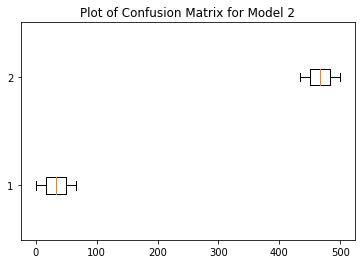

In [21]:
# Confusion Matrix spread
fig1, ax1 = plt.subplots()
ax1.set_title('Plot of Confusion Matrix for Model 2')
ax1.boxplot(results2, vert=False)
plt.show()

In [22]:
# Model 2 - Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, target2, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(gnb.fit(X_train2, y_train2).score(X_test2, y_test2)))
print('Testing on Sample: ' + str(gnb.fit(data2, target2).score(data2, target2)))

With 20% Holdout: 0.545
Testing on Sample: 0.566


In [23]:
# Model 2 - cross validation
from sklearn.model_selection import cross_val_score
score2 = cross_val_score(gnb, data2, target2, cv=10)
print(score2)

[0.56 0.59 0.54 0.56 0.55 0.56 0.57 0.59 0.57 0.56]


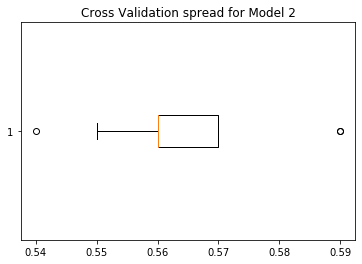

In [24]:
fig1, ax1 = plt.subplots()
ax1.set_title('Cross Validation spread for Model 2')
ax1.boxplot(score2, vert=False)
plt.show()

Gaussian Naive Bayes model accuracy decreased from our first model (64.4% to 56.6%), however there does not seem to be as much overfitting as shown by the cross validation from 0.54 to 0.59.

Perhaps switching to a postive model might improve accuracy and lower overfitting versus the prior two models looking for negative messages.

### Model 3 - Identifying Positive Messages

In [25]:
# Model 3 Based on positive messages
df3 = raw_data.copy()

In [26]:
df3.head(3)

,messages,review
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0


In [27]:
# Model 3 - Selecting postive keywords
keywords3 = ['great','amazing','beautiful','mmmm','loved','wow','happier','good','delight',
            'best', 'quick','fresh','yummy','liked']

for key3 in keywords3:
    df3[str(key3)] = df3.messages.str.contains(
    '' + str(key3) + '',
    case=False)

In [28]:
data3 = df3[keywords3 + ['great']]
target3 = df3['review']

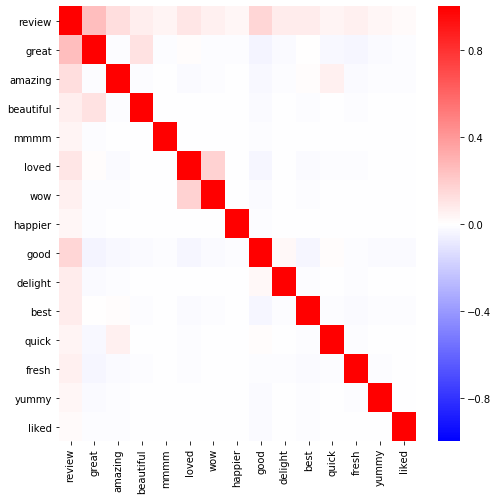

In [29]:
# Model 3
plt.figure(figsize=(8, 8))
sns.heatmap(df3.corr(), center=0, cmap='bwr',vmax=1,vmin=-1)

In [30]:
# Model 3 - Gaussian Naive Bayes
y_pred3 = gnb.fit(data3, target3).predict(data3)
print('Number of mislabeled reviews out of a total {} reviews: {}'.format(
    data2.shape[0],
    (target3 != y_pred3).sum()
))
print("Accuracy : {}%".format(
    gnb.score(data3, target3) * 100
))

Number of mislabeled reviews out of a total 1000 reviews: 389
Accuracy : 61.1%


In [31]:
# Model 3 - confusion matrix
results3 = confusion_matrix(target3,y_pred3)

print('CONFUSION MATRIX:')

print(results3)
print('\n' + 'ACCURACTY SCORE:',accuracy_score(target3, y_pred3))

CONFUSION MATRIX:
[[494   6]
 [383 117]]

ACCURACTY SCORE: 0.611


* Out of the 500 actual instances of positive reviews(1st row), the classifier predicted correctly 494 of them. 
* Out of the 500 actual instances of negative reviews (2nd row), the classifer predicted correctly all 117 of them.
* Out of all 1000 reviews, the classifier predicted correctly 611 of them.

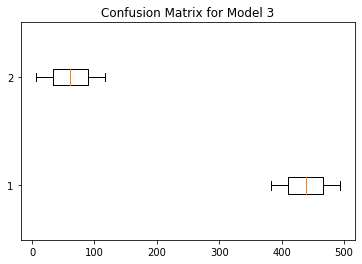

In [32]:
# Confusion Matrix spread
fig1, ax1 = plt.subplots()
ax1.set_title('Confusion Matrix for Model 3')
ax1.boxplot(results3, vert=False)
plt.show()

In [33]:
# Model 3 - Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train3, X_test3, y_train3, y_test3 = train_test_split(data3, target3, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(gnb.fit(X_train3, y_train3).score(X_test3, y_test3)))
print('Testing on Sample: ' + str(gnb.fit(data3, target3).score(data3, target3)))

With 20% Holdout: 0.61
Testing on Sample: 0.611


In [34]:
score3 = cross_val_score(gnb, data3, target3, cv=10)
print(score3)

[0.67 0.56 0.59 0.59 0.59 0.57 0.6  0.64 0.58 0.65]


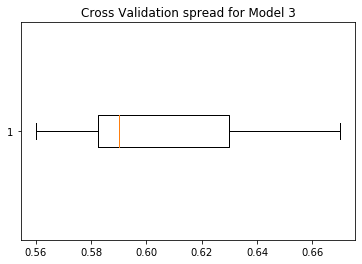

In [35]:
fig1, ax1 = plt.subplots()
ax1.set_title('Cross Validation spread for Model 3')
ax1.boxplot(score3, vert=False)
plt.show()

My negative comment model was a little more successful at 64.4 though all models are fluctuating on the cross validation scores. This is most likely due to not being able to take context of a sentence into consideration, such as some words can be in both types of reviews but have completely different meanings.

Since I was more successful with the Bernoulli model (Model 1), I'm going to try to improve it with additional features.

### Model 4

In [36]:
# Model 4 -  Based on negative messages
df4 = raw_data.copy()

I am going to adjust which of our previous words we used and add some new ones to improve the overall results.
'

In [37]:
# Model 4 - Selecting negative keywords'
keywords4 = ['angry','awful','avoid','avoided', 'bad', 'did not','disappointed','disgusted',
             'do not','mediocre','nasty','never','no','not ','overpriced', 'rude','suck', 
             'terrible','wasted']

for key4 in keywords4:
    df4[str(key4)] = df4.messages.str.contains(
    '' + str(key4) + '',
    case=False)

In [38]:
# Feature for detecting all caps messages
df4['allcaps'] = df4['messages'].str.isupper()

In [39]:
data4 = df4[keywords4 + ['angry']]
target4 = df4['review']

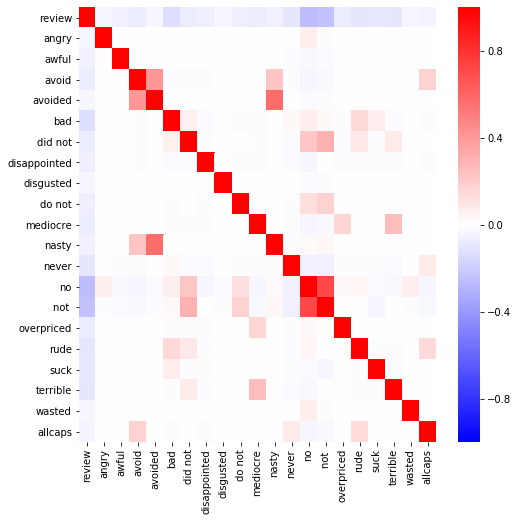

In [40]:
# Model 
plt.figure(figsize=(8, 8))
sns.heatmap(df4.corr(), center=0, cmap='bwr',vmax=1,vmin=-1)

You can see some strong correlation with avoid, avoided, nasty, no, and not.  But is there overfitting?

### Model 4 - Bernoulli Naive Bayes Model adjusted

In [41]:
# Fit our model to the data
y_pred4 = bnb.fit(data4, target4).predict(data4)

# Display our results
print('Number of mislabeled reviews out of a total {} reviews: {}'.format(
    data4.shape[0],
    (target4 != y_pred4).sum()
))
print("Accuracy : {}%".format(
    bnb.score(data4, target4) * 100
))

Number of mislabeled reviews out of a total 1000 reviews: 323
Accuracy : 67.7%


The accuracy improved from 64.4, but is it actually better?

In [42]:
# Model 4 confusion matrix
results4 = confusion_matrix(target4,y_pred4)
print(results4)

[[232 268]
 [ 55 445]]


* Out of the 500 actual instances of positive reviews(1st row), the classifier predicted correctly 212 of them.
* Out of the 500 actual instances of negative reviews (2nd row), the classifer predicted correctly all 450 of them.
* Out of all 1000 reviews, the classifier predicted correctly 662 of them.

While this is an improvement from all our previous models, it is truly a good improvement?  Learning how NLP is truly used and being to differentiate between positive and negative reviews will do more for our models, but we are not going over that lesson yet.

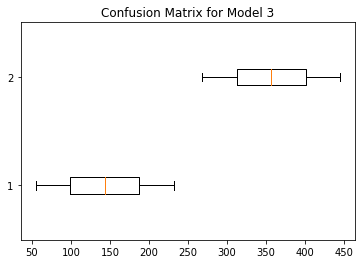

In [43]:
# Confusion Matrix spread
fig1, ax1 = plt.subplots()
ax1.set_title('Confusion Matrix for Model 3')
ax1.boxplot(results4, vert=False)
plt.show()

In [44]:
# Model 4 -Test your model with different holdout groups.

# Use train_test_split to create the necessary training and test groups
X_train4, X_test4, y_train4, y_test4 = train_test_split(data4, target4, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train4, y_train4).score(X_test4, y_test4)))
print('Testing on Sample: ' + str(bnb.fit(data4, target4).score(data4, target4)))

With 20% Holdout: 0.635
Testing on Sample: 0.677


In [45]:
# Model 4 - Cross Validation
score4 = cross_val_score(bnb, data, target, cv=10)
print(score4)

[0.62 0.64 0.63 0.59 0.64 0.67 0.69 0.65 0.66 0.64]


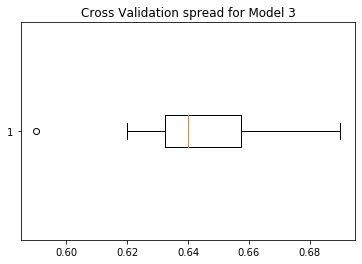

In [46]:
fig1, ax1 = plt.subplots()
ax1.set_title('Cross Validation spread for Model 3')
ax1.boxplot(score4, vert=False)
plt.show()

In [47]:
# Comparing all models (1, 2, & 4)
print('Model 1:\n', results, '\n')
print('Model 2:\n', results2, '\n')
print('Model 3:\n', results3, '\n')
print('Model 4:\n', results4, '\n')
# TN, FP, 
# FN, TP

Model 1:
 [[166 334]
 [ 22 478]] 

Model 2:
 [[ 66 434]
 [  0 500]] 

Model 3:
 [[494   6]
 [383 117]] 

Model 4:
 [[232 268]
 [ 55 445]] 



Let's try one more model of a different type and see if we can improve the accuracy.

## Model 5 

In [48]:
# Model 5 -  Based on negative messages
df5 = raw_data.copy()

I am adding a few more keywords to see if it helps improve our accuracy.

In [49]:
# Model 5 - Selecting negative keywords'
keywords5 = ['angry','avoid','avoided', 'bad', 'did not','disappointed','do not',
             'fail','nasty','no','not ','overpriced', 'rude','suck', 
             'terrible','wasted','worse']

for key5 in keywords5:
    df5[str(key5)] = df5.messages.str.contains(
    '' + str(key5) + '',
    case=False)

In [50]:
# Feature for detecting all caps messages
df5['allcaps'] = df5['messages'].str.isupper()

In [51]:
data5 = df5[keywords5 + ['angry']]
target5 = df5['review']

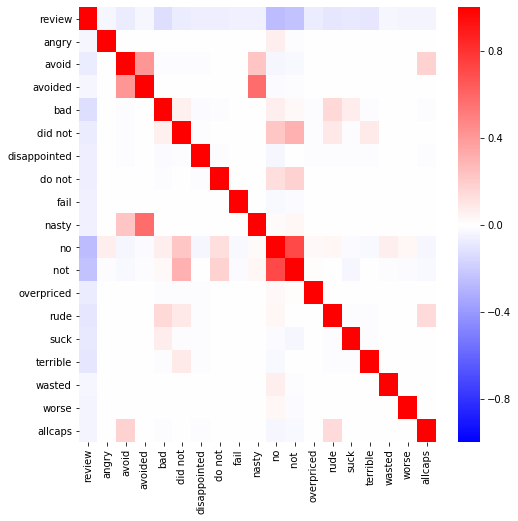

In [52]:
# Model 
plt.figure(figsize=(8, 8))
sns.heatmap(df5.corr(), center=0, cmap='bwr',vmax=1,vmin=-1)

### Model 5 - Complement Naive Bayes

In [53]:
# Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()

# Fit our model to the data
y_pred5 = cnb.fit(data5, target5).predict(data5)

# Display our results
print('Number of mislabeled reviews out of a total {} reviews: {}'.format(
    data5.shape[0],
    (target5 != y_pred5).sum()
))
print("Accuracy : {}%".format(
    cnb.score(data5, target5) * 100
))

Number of mislabeled reviews out of a total 1000 reviews: 602
Accuracy : 39.800000000000004%


In [54]:
# Model 4 confusion matrix
results5 = confusion_matrix(target5,y_pred5)
print(results4)

[[232 268]
 [ 55 445]]


The accuracy on this model leaves something to be desired.  However it did evaluate 0.89 (445) of the True Negative reviews (of the total of 500 negative reviews) correctly and I did target the keywords for negative reviews.  

Being able to target negative and positive keywords separately would have done a better job of evaluating the reviews in all the models.  

Key point to take from this is targeting one type of review will not effectively evaluate difference between multiple targets in the same dataset.  